#### The first question I was trying to answer in my capstone project was: Predict whether or not someone is injured in a collision. For this classification task Im using random forest because its simple and fast to use. Ive tried to predict injuries and kills but kills in my projects were too random to predict.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib


In [2]:
# Loading clean data

Data_merg = pd.read_csv("collisions_merge.csv",low_memory=False)

In [3]:
# Kills are too random to predict 

Data_merg['TOTAL'] = Data_merg['TOTAL INJURED']+ Data_merg['TOTAL KILLED']

In [4]:
# spliting my data 

x = Data_merg[['YEAR', 'MONTH', 'DAY', 'TIME', 'LATITUDE', 'LONGITUDE',
                       'season','Events', 'CloudCover','PrecipitationIn',
                       'Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF',
                       'Max.Dew.PointF', 'MeanDew.PointF', 'Min.DewpointF', 'Max.Humidity',
                       'Mean.Humidity', 'Min.Humidity', 'Max.VisibilityMiles',
                       'Mean.VisibilityMiles', 'Min.VisibilityMiles', 'Max.Wind.SpeedMPH',
                       'Mean.Wind.SpeedMPH', 'Max.Gust.SpeedMPH','CONTR FACTOR VEHICLE 1',
                       'CONTR FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
              ]]

y = Data_merg['TOTAL']

y[y>1] = 1

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
# encoding my categorical data and creating my train, test sets

x_dummy = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size=0.3, stratify=y)

In [6]:
# Classification  

random_forest_c1 = RandomForestClassifier(n_jobs=-1,class_weight='balanced')
random_forest_c1.fit(x_train, y_train)


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

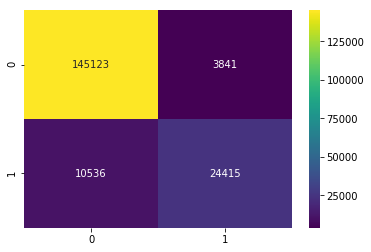

The Train classification accuracy is: 98.843
The Test classification accuracy is: 92.183


In [7]:
# Confusion matrix with classes 
confusion = confusion_matrix(y_test, random_forest_c1.predict(x_test))
sns.heatmap(confusion, annot=True, fmt="g", cmap='viridis')
plt.show()

print("The Train classification accuracy is: %3.3f" % (100 * random_forest_c1.score(x_train,y_train)))
print("The Test classification accuracy is: %3.3f" % (100 * random_forest_c1.score(x_test,y_test)))

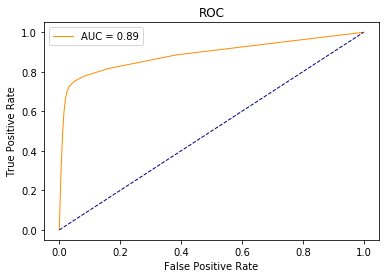

AUC score: 0.888


In [8]:
# ROC curve
classifier = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced'), n_jobs=-1)
probs = classifier.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)
  

plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="best")
plt.show()
print("AUC score: %3.3f" % roc_auc)

In [9]:
# oversampling unbalanced class

from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_res, y_res = sm.fit_sample(x_train, y_train)


In [10]:
# # tunning hyper

# from sklearn.model_selection import GridSearchCV

# model_randforest = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
#      param_grid = { 
#             "n_estimators"      : [700,900,1100],
#             "max_features"      : ["auto"],
#             "min_samples_split" : [2,3],
#              "min_samples_leaf" : [1,3],
#             "max_depth" :[20,30,40], 
#             "bootstrap": [True],
#             },
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=4,
#     verbose=6)

# model_randforest.fit(x_res, y_res)

In [11]:
# loading model

model_randforest = joblib.load('random_forest_model.pkl')

In [12]:
model_randforest.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [13]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test)

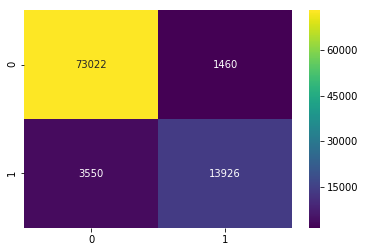

The Train classification accuracy is: 95.386
The validation classification accuracy is: 94.528
The Test classification accuracy is: 94.552


In [14]:
# Confusion matrix with classes 
confusion = confusion_matrix(y_test, model_randforest.predict(x_test))
sns.heatmap(confusion, annot=True, fmt="g", cmap='viridis')
plt.show()

print("The Train classification accuracy is: %3.3f" % (100 * model_randforest.score(x_res,y_res)))
print("The validation classification accuracy is: %3.3f" % (100 * model_randforest.score(x_val,y_val)))
print("The Test classification accuracy is: %3.3f" % (100 * model_randforest.score(x_test,y_test)))

In [15]:
# joblib.dump(model_randforest, 'random_forest_model.pkl')